# Running on new images
This notebook will walk you step by step through the process of using a pre-trained model to detect traffic signs in an image.

# Imports

In [172]:
import warnings
# warnings.filterwarnings('ignore')
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import glob as glob
%matplotlib inline

# Environment setup

In [173]:

import sys

sys.path.append('../models/research')  # Replace with the path to TensorFlow Object Detection API
sys.path.append('../darkflow')  # Replace with the path to Darkflow

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util




# Tensorflow Object Detection API

## Model preparation 

In [174]:
# MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous'
# MODEL_NAME = 'faster_rcnn_resnet_101'
# MODEL_NAME = 'faster_rcnn_resnet50'
MODEL_NAME = 'faster_rcnn_inception_v2'
# MODEL_NAME = 'rfcn_resnet101'
# MODEL_NAME = 'ssd_inception_v2'
# MODEL_NAME = 'ssd_mobilenet_v1'

In [175]:
# Path to frozen detection graph. This is the actual model that is used for the traffic sign detection.
MODEL_PATH = os.path.join('models', MODEL_NAME)
PATH_TO_CKPT = os.path.join(MODEL_PATH,'inference_graph/frozen_inference_graph.pb')

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('gtsdb_data', 'gtsdb3_label_map.pbtxt')

NUM_CLASSES = 3

## Load a (frozen) Tensorflow model into memory

In [176]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `2`, we know that this corresponds to `mandatory`.

In [177]:
# import pickle
# from object_detection.utils import label_map_util

# # Path to your pickle dataset
# pickle_dataset_path = 'dataset.pickle'

# # Load the pickle dataset
# with open(pickle_dataset_path, 'rb') as f:
#     dataset = pickle.load(f)

# # Extract the label map from the dataset
# label_map = dataset['labels']

# # Convert the label map list to a list of category dictionaries
# categories = [{'id': index, 'name': label} for index, label in enumerate(label_map)]

# # Continue with the rest of your code
# category_index = label_map_util.create_category_index(categories)
# ...



# PATH_TO_LABELS = '/home/yuxing/my_project/traffic-sign-detection/gtsdb_data/gtsdb3_label_map.pbtxt'


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(label_map)


item {
  name: "prohibitory"
  id: 1
}
item {
  name: "mandatory"
  id: 2
}
item {
  name: "danger"
  id: 3
}



## Helper code

In [178]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

## Detection

In [179]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/home/yuxing/my_project/traffic-sign-detection/test_images'
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))

# Size, in inches, of the output images.
IMAGE_SIZE = (20, 20)

In [180]:
# with detection_graph.as_default():
#     with tf.Session(graph=detection_graph) as sess:
#         for idx, image_path in enumerate(TEST_IMAGE_PATHS):
#             image = Image.open(image_path)
#             # the array based representation of the image will be used later in order to prepare the
#             # result image with boxes and labels on it.
#             image_np = load_image_into_numpy_array(image)
#             # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
#             image_np_expanded = np.expand_dims(image_np, axis=0)
#             image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
#             # Each box represents a part of the image where a particular object was detected.
#             boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
#             # Each score represent how level of confidence for each of the objects.
#             # Score is shown on the result image, together with the class label.
#             scores = detection_graph.get_tensor_by_name('detection_scores:0')
#             classes = detection_graph.get_tensor_by_name('detection_classes:0')
#             num_detections = detection_graph.get_tensor_by_name('num_detections:0')
#             # Actual detection.
#             (boxes, scores, classes, num_detections) = sess.run(
#                 [boxes, scores, classes, num_detections],
#                 feed_dict={image_tensor: image_np_expanded})
#             # Visualization of the results of a detection.
#             vis_util.visualize_boxes_and_labels_on_image_array(
#                 image_np,
#                 np.squeeze(boxes),
#                 np.squeeze(classes).astype(np.int32),
#                 np.squeeze(scores),
#                 category_index,
#                 use_normalized_coordinates=True,
#                 line_thickness=6)
#             plt.figure(idx, figsize=IMAGE_SIZE)
#             plt.axis('off')
#             plt.imshow(image_np)



In [181]:
confidence_threshold = 0.5

Image 0 Detected Boxes: 1
Batches added in this image: 1
Image 1 Detected Boxes: 1
Batches added in this image: 1
Image 2 Detected Boxes: 2
Batches added in this image: 2
Image 3 Detected Boxes: 1
Batches added in this image: 1
Image 4 Detected Boxes: 1
Batches added in this image: 1


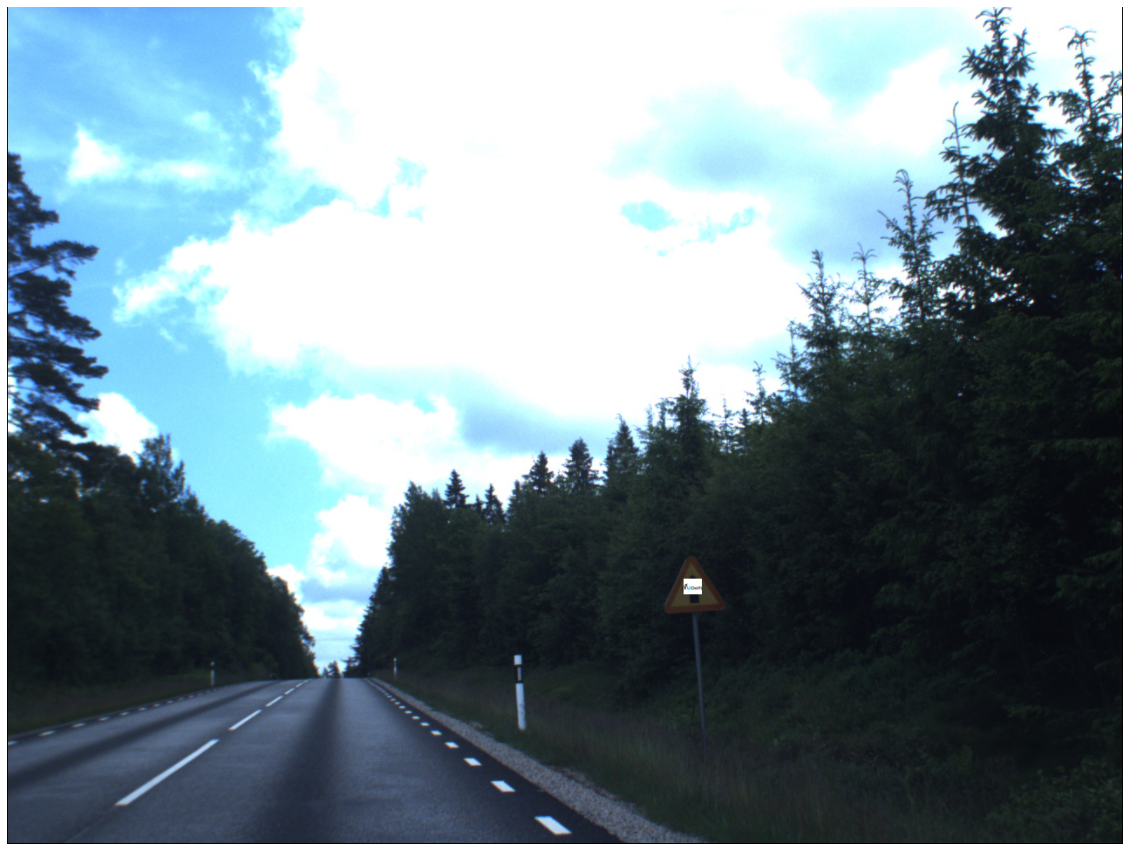

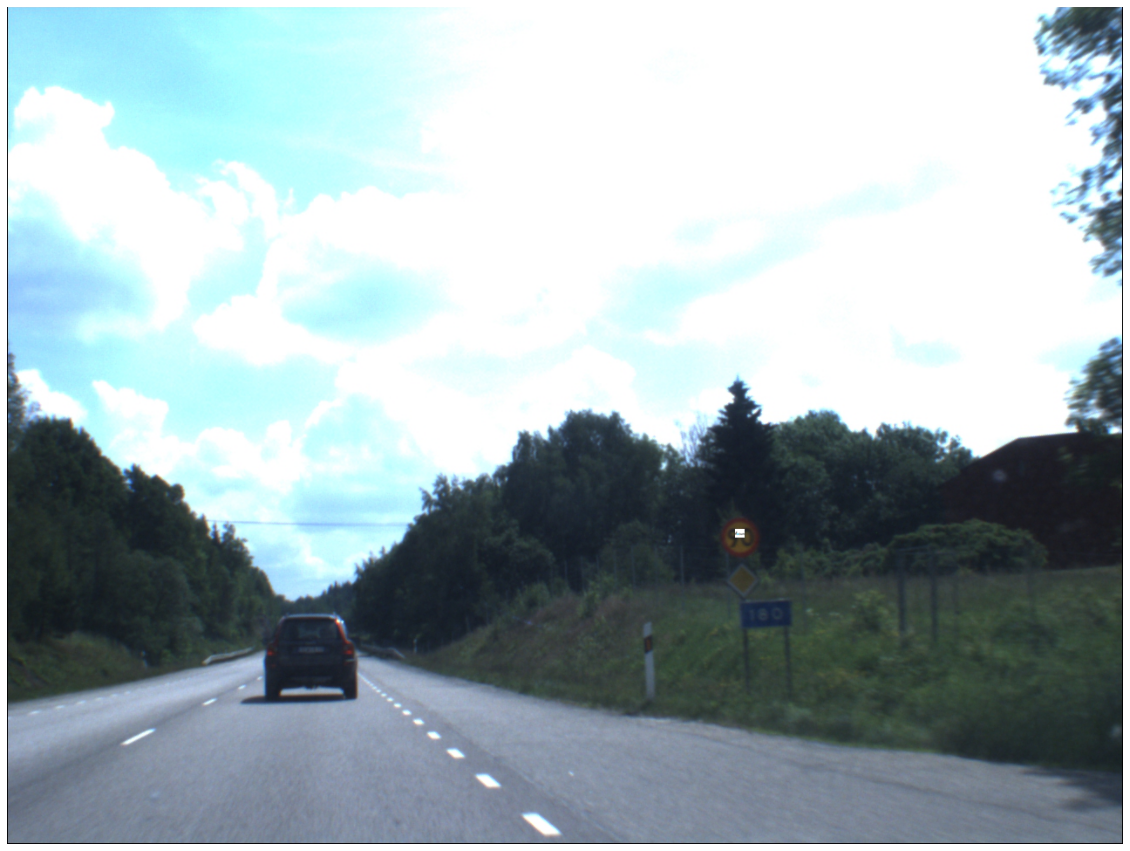

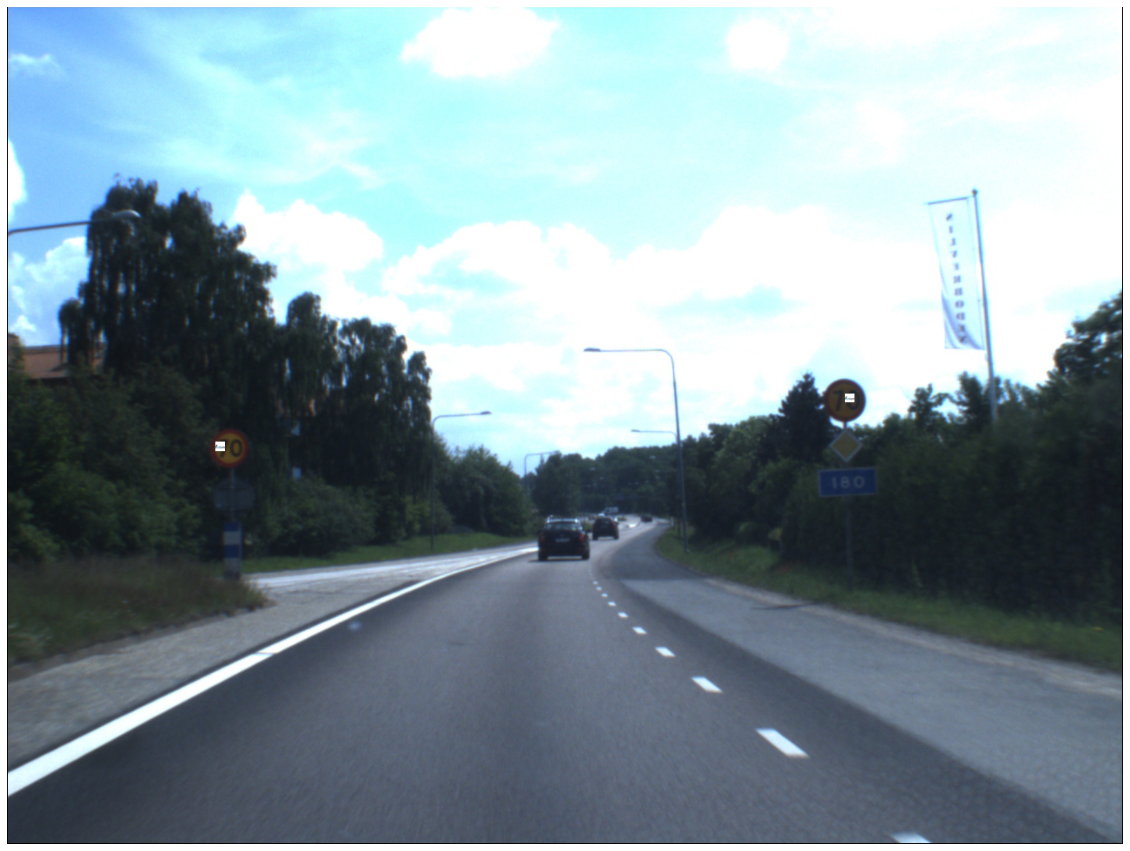

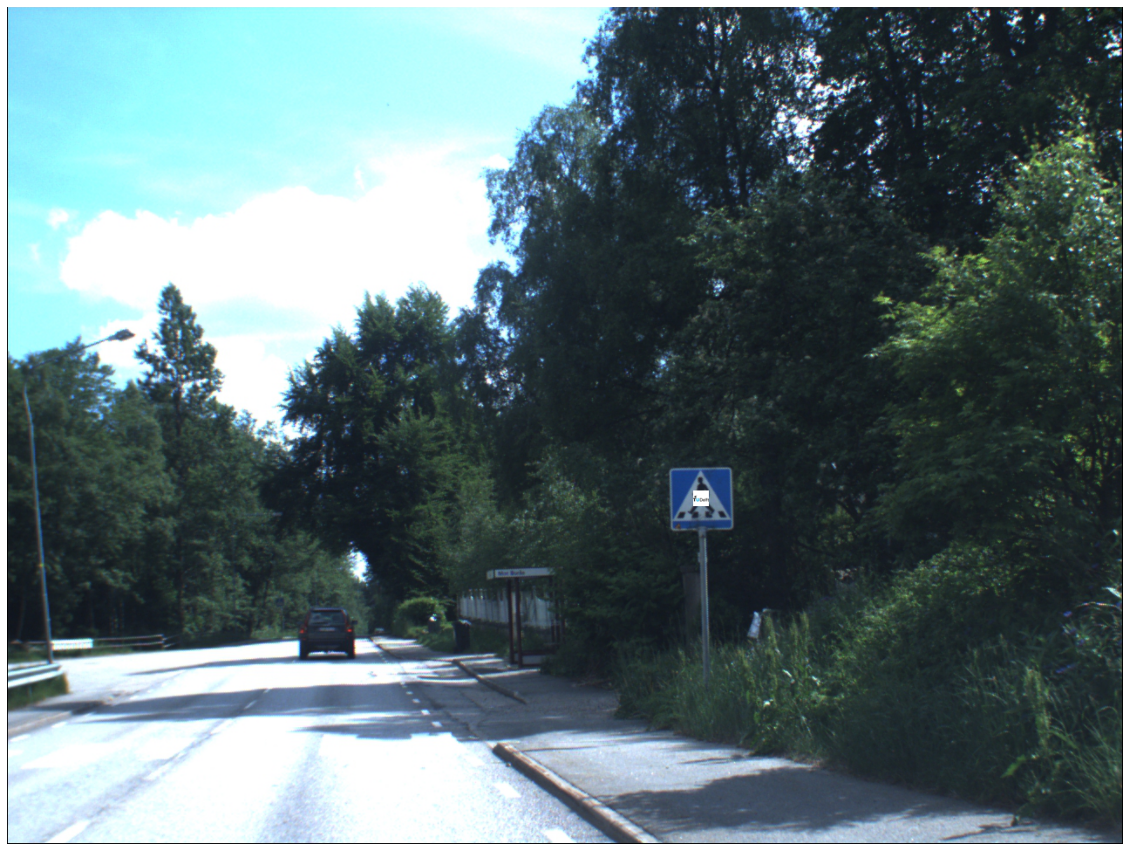

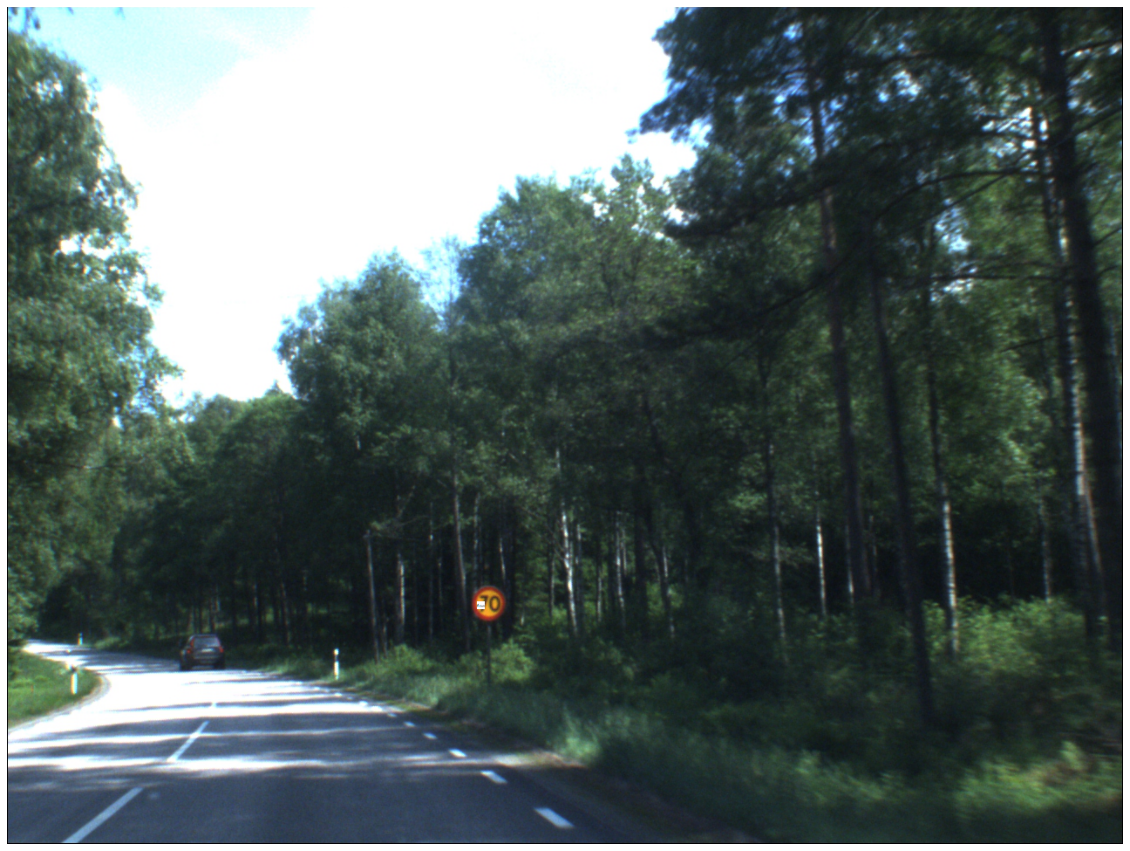

Total boxes processed: 6
Total batches added: 6


In [182]:
from PIL import Image

# Define the function to add batch image to boxes
def add_batch_to_boxes(image_np, boxes, batch_image_path):
    """Add the batch image to the bounding boxes."""
    # Load the batch image
    batch_image = Image.open(batch_image_path)

    for box in boxes:
        ymin, xmin, ymax, xmax = box

        # Calculate box dimensions
        box_height = int((ymax - ymin) * image_np.shape[0])
        box_width = int((xmax - xmin) * image_np.shape[1])

        # Calculate batch image dimensions as 1/6 of the box size
        batch_image_height = box_height // 4
        batch_image_width = box_width // 4

        # Resize the batch image to match the box size
        batch_image_resized = batch_image.resize((batch_image_width, batch_image_height))

        # Convert the batch image to NumPy array
        batch_np = np.array(batch_image_resized)

        # Calculate the position to overlay the batch image at the center of the box
        y_center = int((ymin + ymax) * image_np.shape[0] / 2)
        x_center = int((xmin + xmax) * image_np.shape[1] / 2)
        y1 = max(0, y_center - batch_np.shape[0] // 2)
        x1 = max(0, x_center - batch_np.shape[1] // 2)
        y2 = min(image_np.shape[0], y1 + batch_np.shape[0])
        x2 = min(image_np.shape[1], x1 + batch_np.shape[1])

        # Overlay the batch image at the center of the box
        image_np[y1:y2, x1:x2] = batch_np[:y2-y1, :x2-x1]

    return image_np

# Perform object detection on the images
total_boxes_processed = 0
total_batches_added = 0
modified_images_list = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for idx, image_path in enumerate(TEST_IMAGE_PATHS):
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})

            # Get the number of valid detected boxes and print their indices
            valid_boxes = boxes[0, :int(num_detections[0])]
            valid_scores = scores[0, :int(num_detections[0])]
            num_valid_boxes = sum(valid_scores > confidence_threshold)  # Count boxes with confidence above threshold
            total_boxes_processed += num_valid_boxes

            # Add image index to the name and save to 'all_classes_test' and 'all_scores_test'
            all_classes_test.append(f'Test_{idx + 1}')
            all_scores_test.append(f'Test_{idx + 1}')
            
            print("Image", idx, "Detected Boxes:", num_valid_boxes)

            # Add batch image to the boxes and store the modified image
            batch_image_path = 'batch/1.jpg'  # Replace with the path to your batch image
            image_np_with_batch = add_batch_to_boxes(image_np.copy(), valid_boxes[:num_valid_boxes], batch_image_path)

            # Count the number of batches added in this image
            num_batches_added = num_valid_boxes
            total_batches_added += num_batches_added
            print("Batches added in this image:", num_batches_added)

            # Add image index to the name and save to 'all_classes_modified' and 'all_scores_modified'
            all_classes_modified.append(f'Modified_{idx + 1}')
            all_scores_modified.append(f'Modified_{idx + 1}')
            
            # Store the modified image without showing bounding boxes
            modified_images_list.append(image_np_with_batch)

# Display the modified images without showing bounding boxes
for image_np_with_boxes in modified_images_list:
    plt.figure(figsize=IMAGE_SIZE)
    plt.axis('off')
    plt.imshow(image_np_with_boxes)
    plt.show()

# Print the total number of boxes processed and total batches added
print("Total boxes processed:", total_boxes_processed)
print("Total batches added:", total_batches_added)


In [183]:
# with detection_graph.as_default():
#     with tf.Session(graph=detection_graph) as sess:
#         for idx, image_np in enumerate(modified_images_list):
#             # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
#             image_np_expanded = np.expand_dims(image_np, axis=0)
#             image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
#             boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
#             scores = detection_graph.get_tensor_by_name('detection_scores:0')
#             classes = detection_graph.get_tensor_by_name('detection_classes:0')
#             num_detections = detection_graph.get_tensor_by_name('num_detections:0')

#             # Actual detection.
#             (boxes, scores, classes, num_detections) = sess.run(
#                 [boxes, scores, classes, num_detections],
#                 feed_dict={image_tensor: image_np_expanded})

#             # Visualization of the results of a detection.
#             vis_util.visualize_boxes_and_labels_on_image_array(
#                 image_np,
#                 np.squeeze(boxes),
#                 np.squeeze(classes).astype(np.int32),
#                 np.squeeze(scores),
#                 category_index,
#                 use_normalized_coordinates=True,
#                 line_thickness=6)

#             plt.figure(idx, figsize=IMAGE_SIZE)
#             plt.axis('off')
#             plt.imshow(image_np)


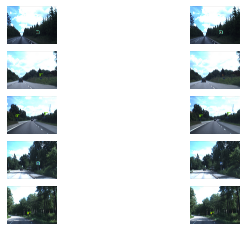

In [184]:
# Store results
all_classes_test = []
all_scores_test = []
all_classes_modified = []
all_scores_modified = []

# Test image
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for idx, image_path in enumerate(TEST_IMAGE_PATHS):
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            
            (boxes_out, scores_out, classes_out, num_detections_out) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})

            # Store classes and scores for test images
            all_classes_test.append(classes_out)
            all_scores_test.append(scores_out)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes_out),
                np.squeeze(classes_out).astype(np.int32),
                np.squeeze(scores_out),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)

            plt.subplot(len(TEST_IMAGE_PATHS), 2, 2*idx+1) 
            plt.axis('off')
            plt.imshow(image_np)

# Modified image
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for idx, image_np in enumerate(modified_images_list):
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            (boxes_out, scores_out, classes_out, num_detections_out) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})

            # Store classes and scores for modified images
            all_classes_modified.append(classes_out)
            all_scores_modified.append(scores_out)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes_out),
                np.squeeze(classes_out).astype(np.int32),
                np.squeeze(scores_out),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)

            plt.subplot(len(modified_images_list), 2, 2*idx+2)
            plt.axis('off')
            plt.imshow(image_np)
            
plt.show()


In [191]:
import pandas as pd

# Define the function to transform our results into a pandas DataFrame
def results_to_df(classes, scores, image_type):
    df = pd.DataFrame()
    for idx, (class_arr, score_arr) in enumerate(zip(classes, scores)):
        class_arr_flat = np.squeeze(class_arr)
        score_arr_flat = np.squeeze(score_arr)
        for class_, score in zip(class_arr_flat, score_arr_flat):
            if score > 0.5:
                df = df.append({
                    'Image': f'{image_type}_{idx + 1}',
                    'Class': category_index[class_]['name'],
                    'Confidence': score
                }, ignore_index=True)

    # Check if df is empty before setting column order
    if not df.empty:
        df = df[['Image', 'Class', 'Confidence']]  # To ensure column order
    return df

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:        
        for idx, image_path in enumerate(TEST_IMAGE_PATHS):
            # ...
            all_classes_test.append(np.squeeze(classes_out).astype(np.int32))
            all_scores_test.append(np.squeeze(scores_out))

        for idx, image_np in enumerate(modified_images_list):
            # ...
            all_classes_modified.append(np.squeeze(classes_out).astype(np.int32))
            all_scores_modified.append(np.squeeze(scores_out))

# Convert results into pandas DataFrames
df_test = results_to_df(all_classes_test, all_scores_test, 'Test')
df_modified = results_to_df(all_classes_modified, all_scores_modified, 'Modified')

# Merge the two dataframes on the 'Image' column
# But first, create a new 'Detection' column representing the detection order
df_test['Detection'] = df_test.groupby('Image').cumcount()
df_modified['Detection'] = df_modified.groupby('Image').cumcount()

df_results = pd.merge(df_test, df_modified, how='outer', on=['Image', 'Detection'], suffixes=('_Test', '_Modified'))

# Display merged results
display(df_results)


Image   Class_Test  Confidence_Test  Detection Class_Modified  \
0        Test_1       danger         0.999960          0            NaN   
1        Test_2  prohibitory         0.999997          0            NaN   
2        Test_3  prohibitory         0.999995          0            NaN   
3        Test_3  prohibitory         0.999861          1            NaN   
4        Test_4       danger         0.999811          0            NaN   
5        Test_5  prohibitory         0.999997          0            NaN   
6        Test_6  prohibitory         0.999995          0            NaN   
7        Test_7  prohibitory         0.999995          0            NaN   
8        Test_8  prohibitory         0.999995          0            NaN   
9        Test_9  prohibitory         0.999995          0            NaN   
10      Test_10  prohibitory         0.999995          0            NaN   
11      Test_11  prohibitory         0.999995          0            NaN   
12      Test_12  prohibitory         0.999995          0            NaN   
13      Test_13  prohibitory         0.999995          0            NaN   
14      Test_14  prohibitory         0.999995          0            NaN   
15      Test_15  prohibitory         0.999995          0            NaN   
16      Test_16  prohibitory         0.999995          0            NaN   
17      Test_17  prohibitory         0.999995          0            NaN   
18      Test_18  prohibitory         0.999995          0            NaN   
19      Test_19  prohibitory         0.999995          0            NaN   
20      Test_20  prohibitory         0.999995          0            NaN   
21   Modified_1          NaN              NaN          0         danger   
22   Modified_3          NaN              NaN          0    prohibitory   
23   Modified_3          NaN              NaN          1    prohibitory   
24   Modified_5          NaN              NaN          0    prohibitory   
25   Modified_6          NaN              NaN          0    prohibitory   
26   Modified_7          NaN              NaN          0    prohibitory   
27   Modified_8          NaN              NaN          0    prohibitory   
28   Modified_9          NaN              NaN          0    prohibitory   
29  Modified_10          NaN              NaN          0    prohibitory   
30  Modified_11          NaN              NaN          0    prohibitory   
31  Modified_12          NaN              NaN          0    prohibitory   
32  Modified_13          NaN              NaN          0    prohibitory   
33  Modified_14          NaN              NaN          0    prohibitory   
34  Modified_15          NaN              NaN          0    prohibitory   
35  Modified_16          NaN              NaN          0    prohibitory   
36  Modified_17          NaN              NaN          0    prohibitory   
37  Modified_18          NaN              NaN          0    prohibitory   
38  Modified_19          NaN              NaN          0    prohibitory   
39  Modified_20          NaN              NaN          0    prohibitory   

    Confidence_Modified  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
5                   NaN  
6                   NaN  
7                   NaN  
8                   NaN  
9                   NaN  
10                  NaN  
11                  NaN  
12                  NaN  
13                  NaN  
14                  NaN  
15                  NaN  
16                  NaN  
17                  NaN  
18                  NaN  
19                  NaN  
20                  NaN  
21             0.999952  
22             0.999994  
23             0.996539  
24             0.999995  
25             0.999995  
26             0.999995  
27             0.999995  
28             0.999995  
29             0.999995  
30             0.999995  
31             0.999995  
32             0.999995  
33             0.999995  
34             0.999995 

# Darkflow

## Model preparation 

In [186]:
import cv2
from darkflow.net.build import TFNet

MODEL_NAME = 'yolo_v2'
MODEL_PATH = os.path.join('models', MODEL_NAME)

options = {
    'model': os.path.join(MODEL_PATH, '{}.cfg'.format(MODEL_NAME)),
    'labels': os.path.join(MODEL_PATH, 'labels.txt'),
    'backup': MODEL_PATH,
    'load': 50500,
    'threshold': 0.5,
    'gpu': 1.0
}

tfnet = TFNet(options)


Parsing models/yolo_v2/yolo_v2.cfg
Loading None ...
Finished in 0.000415802001953125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (

## Helper code

In [187]:
def plot_rectangle(bbox, ax, class_name, edgecolor, confidence=None):
    xmin = bbox[0]
    ymin = bbox[1]
    xmax = bbox[2]
    ymax = bbox[3]
    left = xmin
    right = xmax
    top = ymin
    bot = ymax
    ax.add_patch(
        plt.Rectangle((left, top),
                      right-left,
                      bot-top, fill=False,
                      edgecolor=edgecolor, linewidth=3.5)
        )
    label = '{:s}'.format(class_name)
    label_pos_y = top-10
    if confidence:
        label += ' {0:.2f}'.format(confidence)
        label_pos_y = bot+20
    ax.text(left, label_pos_y,label,
            bbox=dict(facecolor=edgecolor, alpha=0.5),
            fontsize=14, color='white')

In [188]:
def get_label_id(label_name):
    for category in categories:
        if category['name'] == label_name:
            return category['id']

## Detection

In [189]:
# min_score_thresh = 0.5
# for image_path in TEST_IMAGE_PATHS:
#     fig, ax = plt.subplots(figsize=(20, 20))
#     image = Image.open(image_path)
#     image_name = os.path.basename(image_path)
#     width, height = image.size
#     ax.imshow(image)
    
#     image_np = load_image_into_numpy_array(image)
#     image_np = image_np[:,:,::-1] # rgb -> bgr
#     pred_results = tfnet.return_predict(image_np)

#     for idx, det in enumerate(pred_results):
#         score = det['confidence']
#         if score > min_score_thresh:
#             bbox = det['topleft']['x'], det['topleft']['y'], det['bottomright']['x'], det['bottomright']['y']
#             label = get_label_id(det['label'])
#             plot_rectangle(bbox,ax,category_index[label]['name'],'red', score)
#     plt.draw()
#     fig.tight_layout()
#     plt.axis('off')
#     plt.show()